In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [2]:
ARIMA

statsmodels.tsa.arima.model.ARIMA

In [3]:
n = 100000
empty_dataset = np.zeros(n)
mod = SARIMAX(empty_dataset, order=(1, 0, 1), initialization='diffuse')
simulations = pd.Series(mod.simulate([0.1, 0.2, 0.5], n))

NameError: name 'pd' is not defined

<AxesSubplot:>

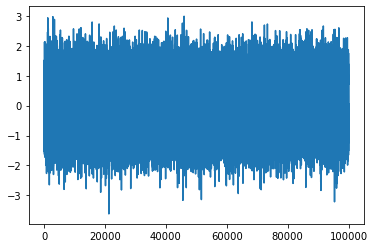

In [245]:
simulations.plot()

<AxesSubplot:>

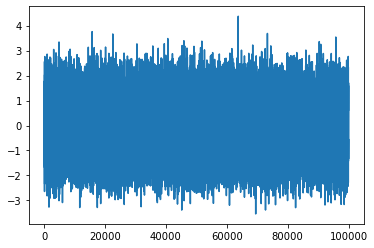

In [246]:
simulations.diff().plot()

In [247]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

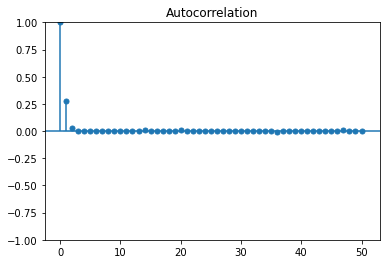

In [248]:
acf_plot = plot_acf(simulations)

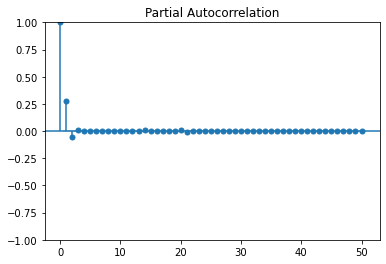

In [249]:
pacf_plot = plot_pacf(simulations, method='ywm')

In [251]:
#create the model
model = SARIMAX(simulations, order=(1, 0, 1))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               100000
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -107114.462
Date:                Mon, 13 Dec 2021   AIC                         214234.925
Time:                        15:45:22   BIC                         214263.464
Sample:                             0   HQIC                        214243.586
                             - 100000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0942      0.011      8.759      0.000       0.073       0.115
ma.L1          0.2035      0.011     19.269      0.000       0.183       0.224
sigma2         0.4988      0.002    222.606      0.0